In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

<IPython.core.display.Javascript object>


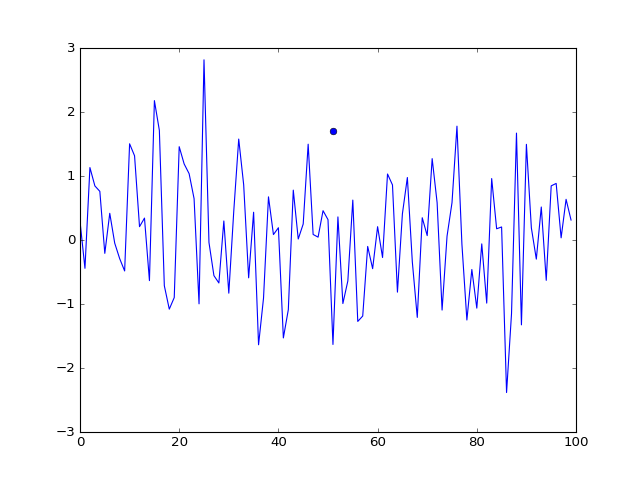

In [4]:
# Mouse click events with button_press_event
plt.plot(np.random.normal(size=100))

def draw_circle(event):
    # Draw a circle
    plt.plot(event.xdata, event.ydata, 'bo')
    # After the figure is updated, re-draw the canvas
    plt.gcf().canvas.draw()
    plt.gcf().canvas.mpl_disconnect(cid)

# Add a listener for mouse button press
cid = plt.gcf().canvas.mpl_connect('button_press_event', draw_circle)

<IPython.core.display.Javascript object>


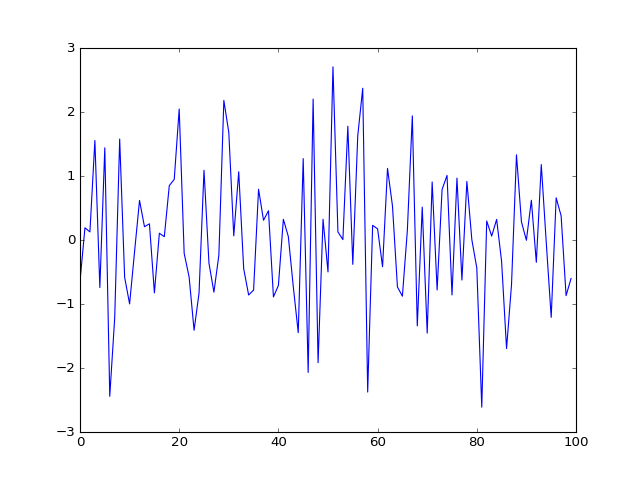

In [5]:
# Keyboard events with key_press_event
plt.clf()
plt.plot(np.random.normal(size=100))
def redraw(event):
    if event.key == 'r':
        plt.cla()
        plt.plot(np.random.normal(size=100))
        plt.gcf().canvas.draw()

# Add a listener for key presses.
cid = plt.gcf().canvas.mpl_connect('key_press_event', redraw)

<IPython.core.display.Javascript object>


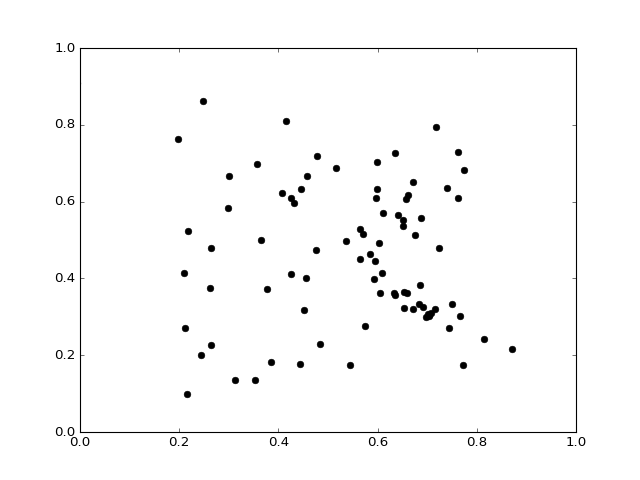

In [13]:
# Using pick_event & picker to move points
plt.plot(np.random.rand(100), np.random.rand(100), 'ko', picker=5)

def gravity(event):
    thispoint = event.artist
    ind = event.ind[0]
    xpos = thispoint.get_xdata()
    ypos = thispoint.get_ydata()
    # Calculate the distance to other particles, update their positions with a r^-2 law
    rpos = np.linalg.norm([xpos-xpos[ind],ypos-ypos[ind]], axis=0)
    thispoint.set_xdata(xpos - 1e-3*(xpos - xpos[ind])/(1e-9+rpos*rpos))
    thispoint.set_ydata(ypos - 1e-3*(ypos - ypos[ind])/(1e-9+rpos*rpos))
    plt.gcf().canvas.draw()
    
cid = plt.gcf().canvas.mpl_connect('pick_event', gravity)

<IPython.core.display.Javascript object>


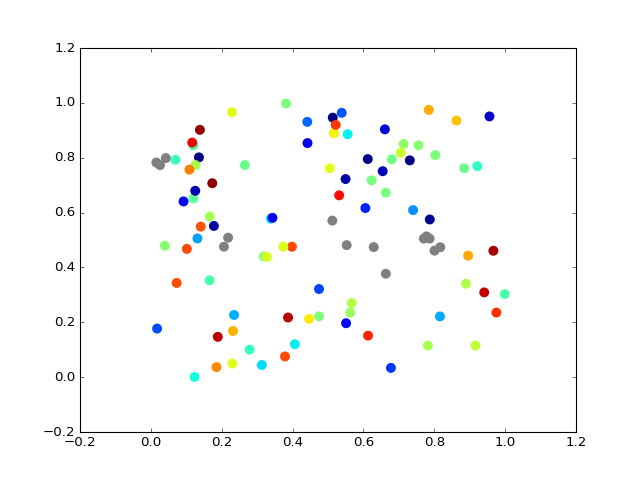

7

In [14]:
# Changing colors with pick_event
plt.scatter(np.random.rand(100), np.random.rand(100), c=np.random.rand(100), s=80, 
            picker=5, edgecolor='none')

def color(event):
    # Get the artist object that has been picked
    thispoint = event.artist
    # Get the element (point in this case) that has been picked
    ind = event.ind
    # Get the old face colors
    newcolor = thispoint.get_facecolors()
    # Zero out and re-set the colors
    newcolor[ind] = [0.5,0.5,0.5,1]
    thispoint.set_facecolors(newcolor)
    plt.gcf().canvas.draw()

plt.gcf().canvas.mpl_connect('pick_event', color)